In [1]:
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# ML 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import BaggingClassifier 
from sklearn.ensemble import GradientBoostingClassifier 
from xgboost import XGBClassifier 
from lightgbm import LGBMClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn import model_selection 
from sklearn import metrics
import matplotlib.pyplot as plt

# ML classifier dictionary: name: (model)
CLASS_MAP = {
    'RF': (RandomForestClassifier()), 
    'ET': (ExtraTreesClassifier()), 
    'ADA' : (AdaBoostClassifier()), 
    'BAG' : (BaggingClassifier()), 
    'GRA' : (GradientBoostingClassifier()), 
    'XGB': (XGBClassifier()), 
    'LGBM': (LGBMClassifier()), 
    'Maxent':(LogisticRegression(max_iter=1000)), 
    }

In [2]:
# ROC 
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

In [3]:
# Classifier evaluation functions (modify pyimpute function)
if True:
    def evaluate_clf(
        clf, X, y, name, k=None, test_size=0.2, scoring="f1_weighted", feature_names=None
    ):
        print(name)
        X_train, X_test, y_train, y_true = model_selection.train_test_split(
            X, y,
            test_size=test_size, # Test data size
            shuffle=True, # Shuffle the data before split
            stratify=y, # Keeping the appearance/non-appearance ratio of Y,
            random_state=42
        )
        if k: # Cross-validation
            kf = model_selection.KFold(n_splits=k) # k-fold
            scores = model_selection.cross_val_score(clf, X_train, y_train, cv=kf, scoring=scoring)
            print(name + " %d-fold Cross Validation Accuracy: %0.2f (+/- %0.2f)"
                % (k, scores.mean() * 100, scores.std() * 200))
            print()
        pipe = make_pipeline(MinMaxScaler(), clf)
        pipe.fit(X_train, y_train)
        
        #pipe.fit(X_train, y_train) # Training of classifiers
        y_pred = pipe.predict(X_test) # Classifier predictions
        
        # Classifier evaluation metrics
        print("Accuracy Score: %.2f" % metrics.accuracy_score(y_true, y_pred))
        print()

        print("Classification report")
        print(metrics.classification_report(y_true, y_pred))
        print()

        print("Confussion matrix")
        print(metrics.confusion_matrix(y_true, y_pred))
        print()
        
        print('AUC(ROC): %.2f'% metrics.roc_auc_score(y_true, y_pred))
        print()
        
        # ROC 
        probs = pipe.predict_proba(X_test) 
        prob = probs[:, 1]  
        fper, tper, thresholds = metrics.roc_curve(y_true, prob)
        plot_roc_curve(fper, tper)

        if hasattr(clf, "feature_importances_"):
            print("Feature importances")
            for f, imp in zip(feature_names, clf.feature_importances_):
                print("%20s: %s" % (f, round(imp * 100, 1)))
            print()
        return pipe

In [4]:
if False:
    def evaluate_clf(
        clf, X, y, name, k=None, test_size=0.2, scoring="f1_weighted", feature_names=None
    ):
        print(name)
        X_train, X_test, y_train, y_true = model_selection.train_test_split(
            X, y,
            test_size=test_size, # Test data size
            shuffle=True, # Shuffle the data before split
            stratify=y # Keeping the appearance/non-appearance ratio of Y
        )

        if k: # Cross-validation
            kf = model_selection.KFold(n_splits=k) # k-fold
            scores = model_selection.cross_val_score(clf, X_train, y_train, cv=kf, scoring=scoring)
            print(name + " %d-fold Cross Validation Accuracy: %0.2f (+/- %0.2f)"
                % (k, scores.mean() * 100, scores.std() * 200))
            print()
        
        clf.fit(X_train, y_train) # Training of classifiers
        y_pred = clf.predict(X_test) # Classifier predictions
        
        # Classifier evaluation metrics
        print("Accuracy Score: %.2f" % metrics.accuracy_score(y_true, y_pred))
        print()

        print("Classification report")
        print(metrics.classification_report(y_true, y_pred))
        print()

        print("Confussion matrix")
        print(metrics.confusion_matrix(y_true, y_pred))
        print()
        
        print('AUC(ROC): %.2f'% metrics.roc_auc_score(y_true, y_pred))
        print()
        
        # ROC 
        probs = clf.predict_proba(X_test) 
        prob = probs[:, 1]  
        fper, tper, thresholds = metrics.roc_curve(y_true, prob)
        plot_roc_curve(fper, tper)

        if hasattr(clf, "feature_importances_"):
            print("Feature importances")
            for f, imp in zip(feature_names, clf.feature_importances_):
                print("%20s: %s" % (f, round(imp * 100, 1)))
            print()
        return clf

In [5]:
df = pd.read_parquet("../generated_files/features_filtered.parquet")
df = df.dropna()

y = df.pop("Presence")
X = df.copy()

MaxEnt


c:\Users\kenji\dev\web-scraping-images-vinacea\web-scraping-images-vinacea\web-scraping-venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\kenji\dev\web-scraping-images-vinacea\web-scraping-images-vinacea\web-scraping-venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the d

MaxEnt 5-fold Cross Validation Accuracy: 95.69 (+/- 1.97)

Accuracy Score: 0.96

Classification report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       558
           1       0.90      0.49      0.63        39

    accuracy                           0.96       597
   macro avg       0.94      0.74      0.81       597
weighted avg       0.96      0.96      0.96       597


Confussion matrix
[[556   2]
 [ 20  19]]

AUC(ROC): 0.74



c:\Users\kenji\dev\web-scraping-images-vinacea\web-scraping-images-vinacea\web-scraping-venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


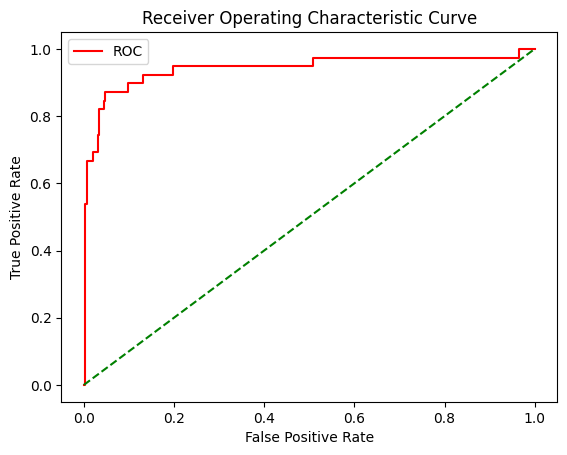

In [6]:
maxent = LogisticRegression(max_iter=3_000)
maxent = evaluate_clf(maxent, X, y, "MaxEnt", k=5, test_size=0.2, scoring="f1_weighted", feature_names=X.columns)

RF
RF 5-fold Cross Validation Accuracy: 97.41 (+/- 0.85)

Accuracy Score: 0.99

Classification report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       558
           1       0.97      0.82      0.89        39

    accuracy                           0.99       597
   macro avg       0.98      0.91      0.94       597
weighted avg       0.99      0.99      0.99       597


Confussion matrix
[[557   1]
 [  7  32]]

AUC(ROC): 0.91



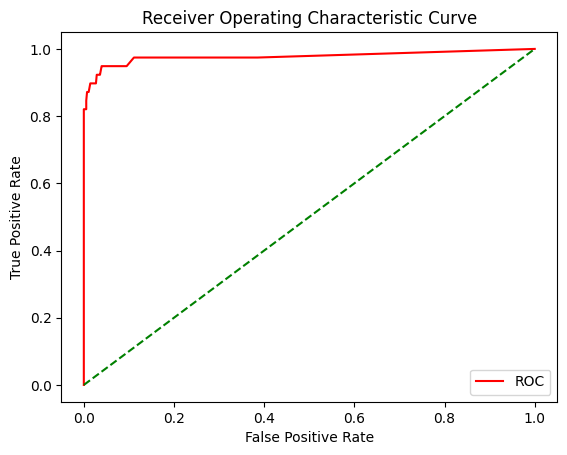

Feature importances
             BIOVAR1: 20.0
             BIOVAR2: 3.3
             BIOVAR4: 4.9
             BIOVAR7: 6.0
             BIOVAR9: 11.7
            BIOVAR12: 9.0
            BIOVAR13: 4.7
Cultivated_and_Managed_Vegetation: 3.1
Deciduous_Broadleaf_Trees: 3.4
Evergreen_Broadleaf_Trees: 3.9
              Shrubs: 1.3
vegetacao_ibge1992_br: 2.2
        solos2001_br: 3.7
       sa2001tree_br: 3.2
        exposicao_br: 3.0
         density3_br: 4.0
      declividade_br: 3.1
         altitude_br: 9.3



In [7]:
rf = RandomForestClassifier()
rf = evaluate_clf(rf, X, y, "RF", k=5, test_size=0.2, scoring="f1_weighted", feature_names=X.columns)

In [8]:
import pyimpute

In [9]:
tiff_output_files = [
    '../generated_files/mantiqueira_cropped/wc2.1_30s_bio_1.tif',
    '../generated_files/mantiqueira_cropped/wc2.1_30s_bio_2.tif',
    '../generated_files/mantiqueira_cropped/wc2.1_30s_bio_4.tif',
    '../generated_files/mantiqueira_cropped/wc2.1_30s_bio_7.tif',
    '../generated_files/mantiqueira_cropped/wc2.1_30s_bio_9.tif',
    '../generated_files/mantiqueira_cropped/wc2.1_30s_bio_12.tif',
    '../generated_files/mantiqueira_cropped/wc2.1_30s_bio_13.tif',
    '../generated_files/mantiqueira_cropped/Cultivated_and_Managed_Vegetation.tif',
    '../generated_files/mantiqueira_cropped/Deciduous_Broadleaf_Trees.tif',
    '../generated_files/mantiqueira_cropped/Evergreen_Broadleaf_Trees.tif',
    '../generated_files/mantiqueira_cropped/Shrubs.tif',
    '../generated_files/mantiqueira_transformed/vegetacao_ibge1992_br.tif',
    '../generated_files/mantiqueira_transformed/solos2001_br.tif',
    '../generated_files/mantiqueira_transformed/sa2001tree_br.tif',
    '../generated_files/mantiqueira_transformed/exposicao_br.tif',
    '../generated_files/mantiqueira_transformed/density3_br.tif',
    '../generated_files/mantiqueira_transformed/declividade_br.tif',
    '../generated_files/mantiqueira_transformed/altitude_br.tif'
]

In [10]:
import rasterio

In [11]:
with rasterio.open('../generated_files/mantiqueira_transformed/altitude_br.tif') as src:
    print(src.nodata)

-9999.0


In [12]:
target_xs, raster_info = pyimpute.load_targets(tiff_output_files)

In [13]:
raster_info

{'transform': Affine(0.008333333333333333, 0.0, -47.01666666666668,
        0.0, -0.008333333333333333, -18.358333333333334),
 'shape': (616, 822),
 'crs': CRS.from_epsg(4326)}

In [14]:
pyimpute.impute(target_xs, maxent, raster_info, outdir='../OUTPUT/' + 'MAXENT' + '-IMAGES', class_prob=True, certainty=True)
pyimpute.impute(target_xs, rf, raster_info, outdir='../OUTPUT/' + 'RF' + '-IMAGES', class_prob=True, certainty=True)

c:\Users\kenji\dev\web-scraping-images-vinacea\web-scraping-images-vinacea\web-scraping-venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\kenji\dev\web-scraping-images-vinacea\web-scraping-images-vinacea\web-scraping-venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\kenji\dev\web-scraping-images-vinacea\web-scraping-images-vinacea\web-scraping-venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\kenji\dev\web-scraping-images-vinacea\web-scraping-images-vinacea\web-scraping-venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [15]:
import rasterio

In [16]:
def plotit(x, title, cmap="Blues"):
    plt.figure(figsize = (14,7))
    plt.imshow(x, cmap=cmap, interpolation='nearest')
    plt.colorbar()
    plt.title(title, fontweight = 'bold')
    
    
distr_rf = rasterio.open("../OUTPUT/MAXENT-IMAGES/probability_1.tif").read(1) 
distr_et = rasterio.open("../OUTPUT/RF-IMAGES/probability_1.tif").read(1)

distr_averaged = (distr_rf + distr_et)/2

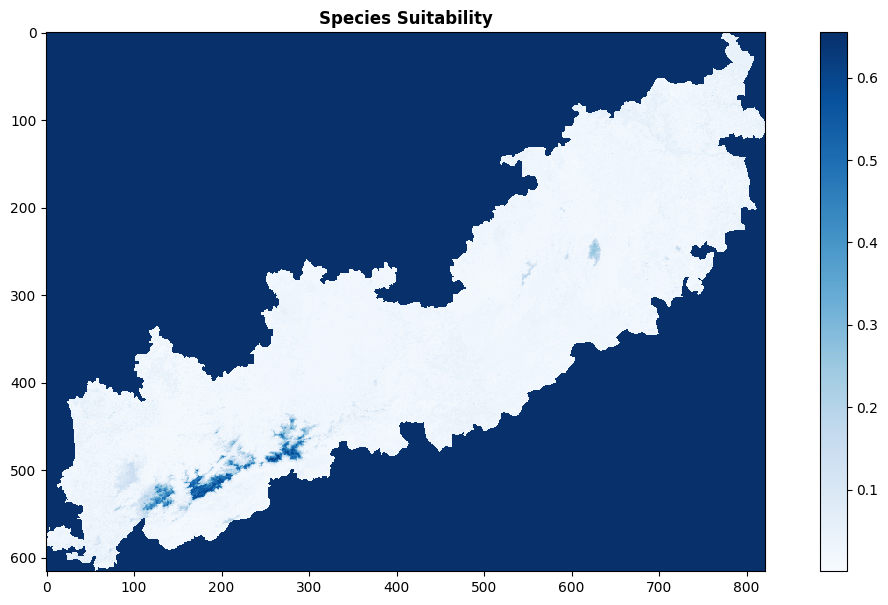

In [17]:
plotit(distr_averaged, "Species Suitability", cmap="Blues")